In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [171]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [172]:
df = pd.read_csv('/content/drive/MyDrive/Session-42-Non-Gaussian-distribution/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [173]:
(df['Survived'].value_counts()/df['Survived'].value_counts().sum())*100

,count
Survived,
0,61.616162
1,38.383838


In [174]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [175]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [176]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [177]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [178]:
X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

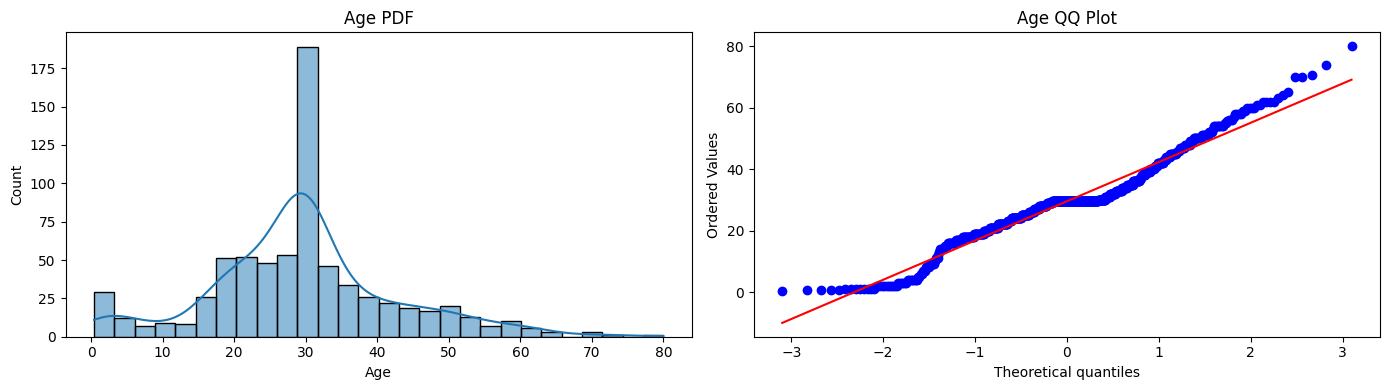

In [180]:
plt.figure(figsize=(14,4))
# Left plot: Histogram + KDE
plt.subplot(121)
sns.histplot(X_train['Age'], kde=True)
plt.title('Age PDF')

# Right plot: QQ plot
plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.tight_layout()
plt.show()

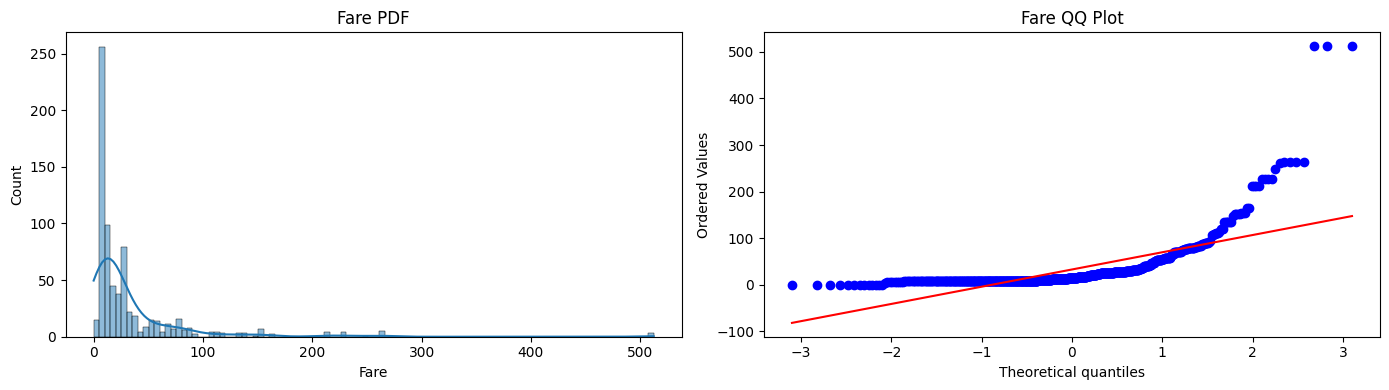

In [181]:
plt.figure(figsize=(14,4))
# Left plot: Histogram + KDE
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

# Right plot: QQ plot
plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.tight_layout()
plt.show()

In [182]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [183]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6480446927374302


In [184]:
trf = FunctionTransformer(func=np.log1p)

In [185]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [186]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6536312849162011


In [187]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.655518102372035


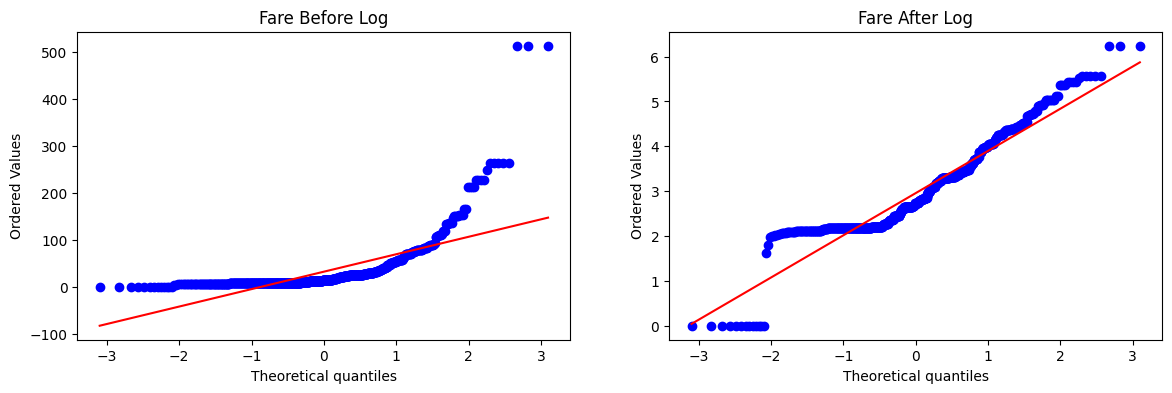

In [188]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

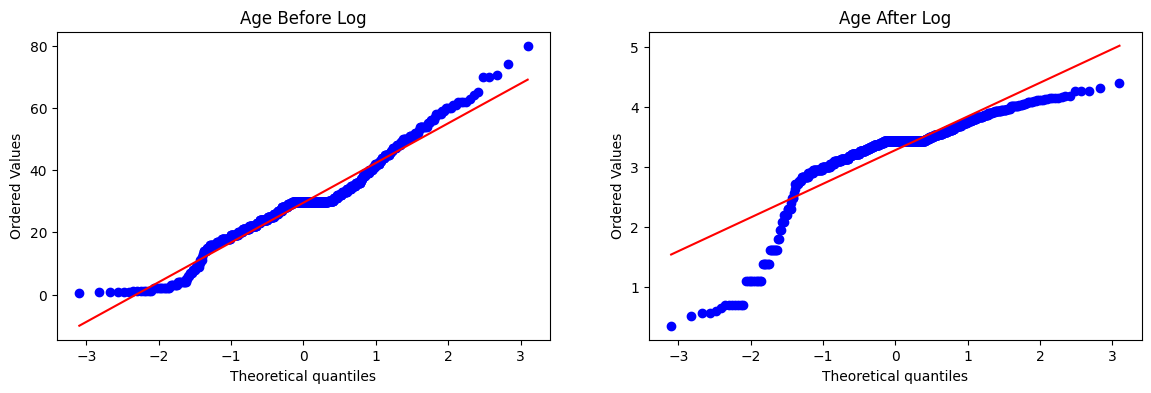

In [189]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

### Using `ColumnTransformer()`

In [190]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [191]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6815642458100558


In [192]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6644569288389512


### Custom Method for Transformations

In [193]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()


Accuracy 0.6431335830212235


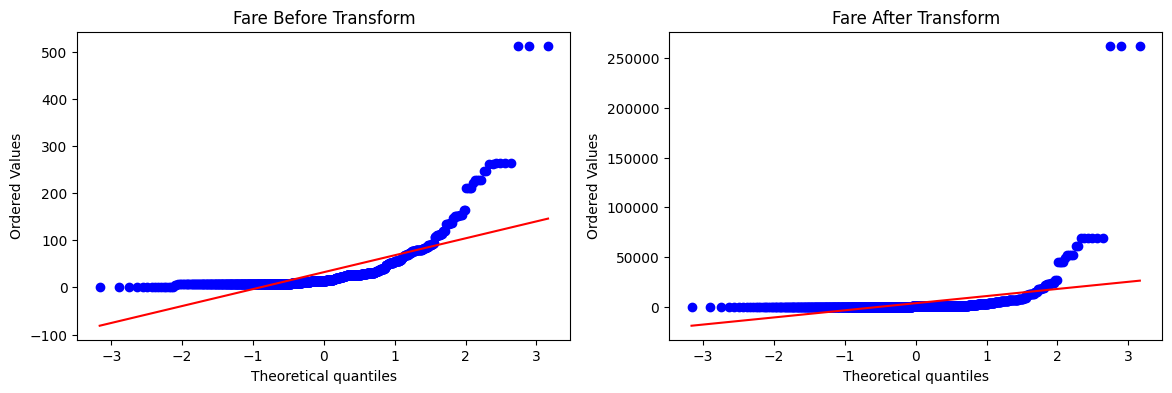

In [194]:
## sq tans
apply_transform(lambda x : x**2)

Accuracy 0.61729088639201


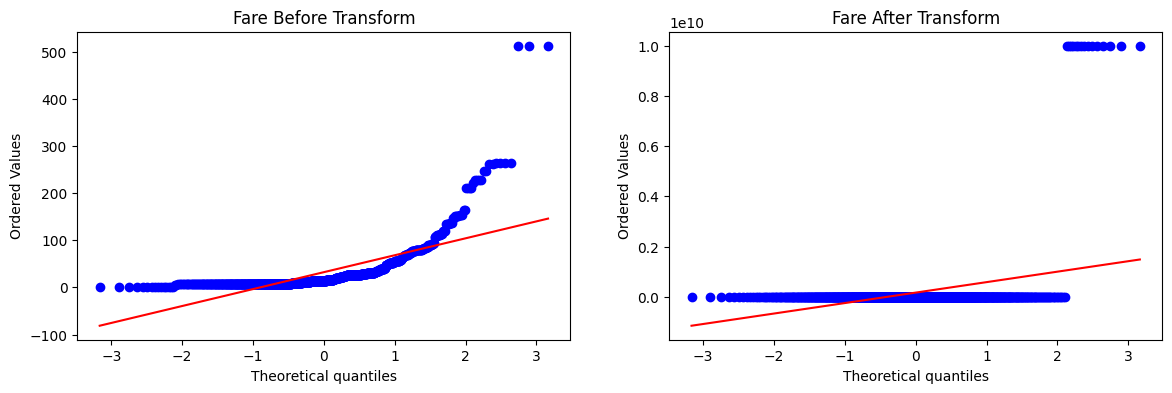

In [195]:
## Reciporcal tans
apply_transform(lambda x : 1/(x+0.0000000001))

Accuracy 0.6712609238451936


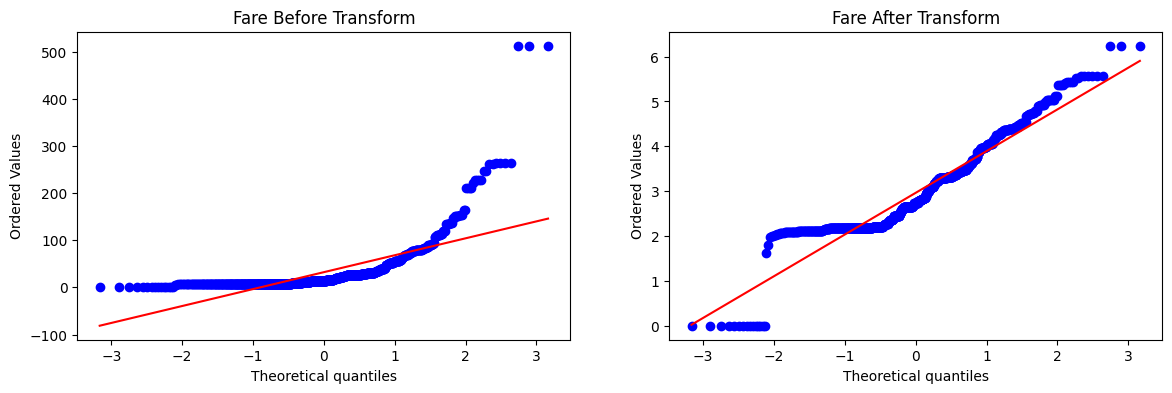

In [196]:
apply_transform(np.log1p)

Accuracy 0.6611485642946316


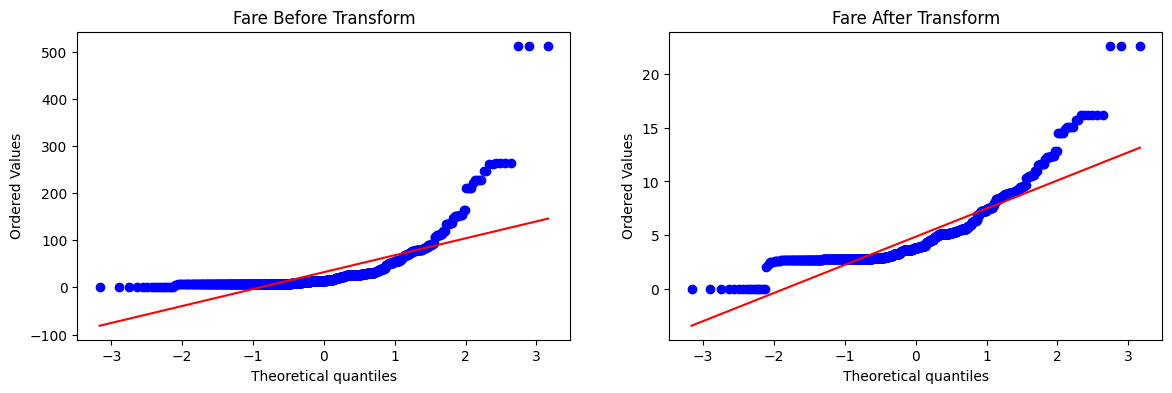

In [197]:
# Sqroot tans
apply_transform(np.sqrt)